In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: C
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


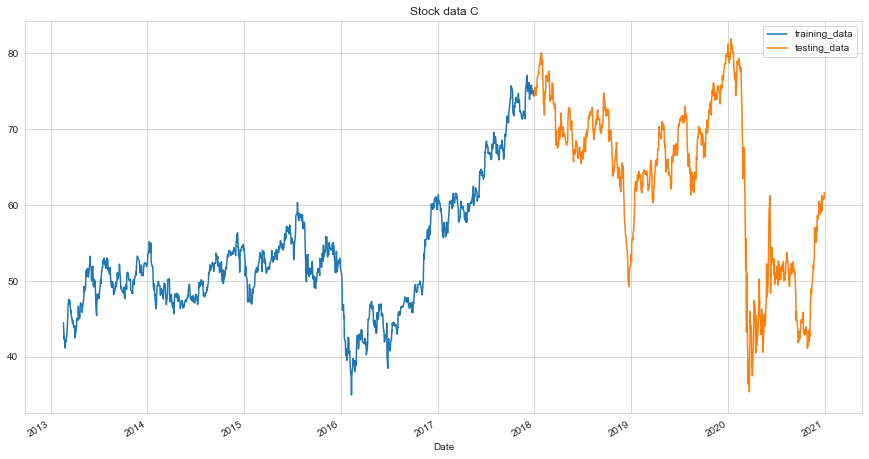

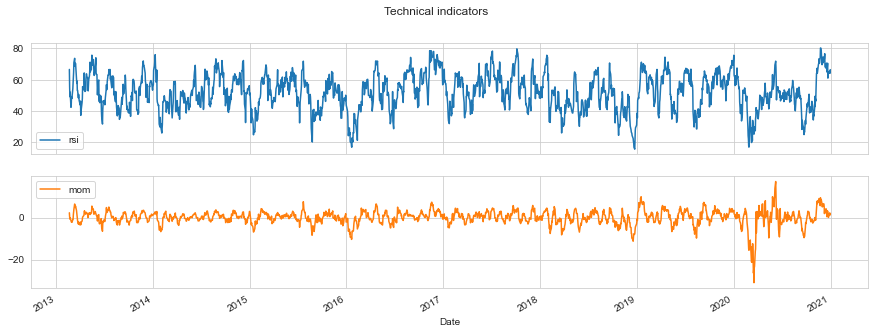

In [2]:
stock_name = 'c'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1325.14, duration: 0:00:00.284082
episode: 2/2000, episode end value: 1250.41, duration: 0:00:00.247039
episode: 3/2000, episode end value: 1257.38, duration: 0:00:00.238051
episode: 4/2000, episode end value: 1254.94, duration: 0:00:00.267059
episode: 5/2000, episode end value: 1255.67, duration: 0:00:00.262950
episode: 6/2000, episode end value: 1261.76, duration: 0:00:00.237015
episode: 7/2000, episode end value: 1276.88, duration: 0:00:00.244532
episode: 8/2000, episode end value: 1244.54, duration: 0:00:00.233068
episode: 9/2000, episode end value: 1311.53, duration: 0:00:00.224035
episode: 10/2000, episode end value: 1254.90, duration: 0:00:00.231050
episode: 11/2000, episode end value: 1260.16, duration: 0:00:00.234054
episode: 12/2000, episode end value: 1294.45, duration: 0:00:00.243046
episode: 13/2000, episode end value: 1310.58, duration: 0:00:00.231068
episode: 14/2000, episode end value: 1251.68, duration: 0:00:00.236051
episode: 15/200

episode: 117/2000, episode end value: 1310.55, duration: 0:00:00.230051
episode: 118/2000, episode end value: 1306.11, duration: 0:00:00.244071
episode: 119/2000, episode end value: 1287.08, duration: 0:00:00.228040
episode: 120/2000, episode end value: 1306.59, duration: 0:00:00.214053
episode: 121/2000, episode end value: 1279.41, duration: 0:00:00.194030
episode: 122/2000, episode end value: 1329.97, duration: 0:00:00.181042
episode: 123/2000, episode end value: 1301.58, duration: 0:00:00.184055
episode: 124/2000, episode end value: 1342.45, duration: 0:00:00.176040
episode: 125/2000, episode end value: 1425.24, duration: 0:00:00.173039
episode: 126/2000, episode end value: 1384.25, duration: 0:00:00.197039
episode: 127/2000, episode end value: 1362.28, duration: 0:00:00.177041
episode: 128/2000, episode end value: 1259.53, duration: 0:00:00.182023
episode: 129/2000, episode end value: 1299.57, duration: 0:00:00.242056
episode: 130/2000, episode end value: 1315.74, duration: 0:00:00

episode: 231/2000, episode end value: 1393.65, duration: 0:00:00.304071
episode: 232/2000, episode end value: 1322.23, duration: 0:00:00.311071
episode: 233/2000, episode end value: 1309.38, duration: 0:00:00.353082
episode: 234/2000, episode end value: 1322.81, duration: 0:00:00.395087
episode: 235/2000, episode end value: 1371.99, duration: 0:00:00.344077
episode: 236/2000, episode end value: 1295.88, duration: 0:00:00.313070
episode: 237/2000, episode end value: 1335.91, duration: 0:00:00.346076
episode: 238/2000, episode end value: 1295.26, duration: 0:00:00.287066
episode: 239/2000, episode end value: 1326.27, duration: 0:00:00.270063
episode: 240/2000, episode end value: 1359.94, duration: 0:00:00.262055
episode: 241/2000, episode end value: 1272.28, duration: 0:00:00.250056
episode: 242/2000, episode end value: 1379.38, duration: 0:00:00.234053
episode: 243/2000, episode end value: 1298.08, duration: 0:00:00.289067
episode: 244/2000, episode end value: 1322.62, duration: 0:00:00

episode: 345/2000, episode end value: 1332.62, duration: 0:00:00.357078
episode: 346/2000, episode end value: 1420.79, duration: 0:00:00.324075
episode: 347/2000, episode end value: 1332.98, duration: 0:00:00.334076
episode: 348/2000, episode end value: 1292.62, duration: 0:00:00.337077
episode: 349/2000, episode end value: 1298.67, duration: 0:00:00.305069
episode: 350/2000, episode end value: 1358.01, duration: 0:00:00.302589
episode: 351/2000, episode end value: 1306.30, duration: 0:00:00.315064
episode: 352/2000, episode end value: 1443.15, duration: 0:00:00.281063
episode: 353/2000, episode end value: 1343.11, duration: 0:00:00.290059
episode: 354/2000, episode end value: 1352.94, duration: 0:00:00.293070
episode: 355/2000, episode end value: 1286.52, duration: 0:00:00.311070
episode: 356/2000, episode end value: 1391.89, duration: 0:00:00.289062
episode: 357/2000, episode end value: 1317.56, duration: 0:00:00.316070
episode: 358/2000, episode end value: 1329.56, duration: 0:00:00

episode: 459/2000, episode end value: 1320.45, duration: 0:00:00.339083
episode: 460/2000, episode end value: 1320.05, duration: 0:00:00.352075
episode: 461/2000, episode end value: 1315.58, duration: 0:00:00.427098
episode: 462/2000, episode end value: 1317.82, duration: 0:00:00.393093
episode: 463/2000, episode end value: 1321.88, duration: 0:00:00.404341
episode: 464/2000, episode end value: 1316.63, duration: 0:00:00.318996
episode: 465/2000, episode end value: 1364.73, duration: 0:00:00.386157
episode: 466/2000, episode end value: 1391.62, duration: 0:00:00.348078
episode: 467/2000, episode end value: 1328.50, duration: 0:00:00.341077
episode: 468/2000, episode end value: 1427.28, duration: 0:00:00.385084
episode: 469/2000, episode end value: 1365.36, duration: 0:00:00.370084
episode: 470/2000, episode end value: 1298.02, duration: 0:00:00.447106
episode: 471/2000, episode end value: 1353.56, duration: 0:00:00.411092
episode: 472/2000, episode end value: 1329.89, duration: 0:00:00

episode: 573/2000, episode end value: 1308.56, duration: 0:00:00.443106
episode: 574/2000, episode end value: 1326.57, duration: 0:00:00.425095
episode: 575/2000, episode end value: 1292.43, duration: 0:00:00.439096
episode: 576/2000, episode end value: 1373.38, duration: 0:00:00.385084
episode: 577/2000, episode end value: 1318.33, duration: 0:00:00.475109
episode: 578/2000, episode end value: 1301.81, duration: 0:00:00.436100
episode: 579/2000, episode end value: 1383.99, duration: 0:00:00.368759
episode: 580/2000, episode end value: 1330.76, duration: 0:00:00.485114
episode: 581/2000, episode end value: 1356.53, duration: 0:00:00.385086
episode: 582/2000, episode end value: 1303.60, duration: 0:00:00.429601
episode: 583/2000, episode end value: 1366.35, duration: 0:00:00.439096
episode: 584/2000, episode end value: 1325.38, duration: 0:00:00.463105
episode: 585/2000, episode end value: 1304.95, duration: 0:00:00.480404
episode: 586/2000, episode end value: 1333.86, duration: 0:00:00

episode: 687/2000, episode end value: 1345.28, duration: 0:00:00.470103
episode: 688/2000, episode end value: 1306.51, duration: 0:00:00.461111
episode: 689/2000, episode end value: 1317.36, duration: 0:00:00.434093
episode: 690/2000, episode end value: 1309.98, duration: 0:00:00.532120
episode: 691/2000, episode end value: 1339.82, duration: 0:00:00.379086
episode: 692/2000, episode end value: 1337.69, duration: 0:00:00.420099
episode: 693/2000, episode end value: 1284.76, duration: 0:00:00.475113
episode: 694/2000, episode end value: 1351.20, duration: 0:00:00.418090
episode: 695/2000, episode end value: 1275.77, duration: 0:00:00.365080
episode: 696/2000, episode end value: 1320.17, duration: 0:00:00.543126
episode: 697/2000, episode end value: 1332.72, duration: 0:00:00.506118
episode: 698/2000, episode end value: 1296.73, duration: 0:00:00.498108
episode: 699/2000, episode end value: 1333.49, duration: 0:00:00.393083
episode: 700/2000, episode end value: 1315.41, duration: 0:00:00

episode: 801/2000, episode end value: 1356.72, duration: 0:00:00.545120
episode: 802/2000, episode end value: 1385.67, duration: 0:00:00.577134
episode: 803/2000, episode end value: 1289.77, duration: 0:00:00.403089
episode: 804/2000, episode end value: 1334.28, duration: 0:00:00.459105
episode: 805/2000, episode end value: 1351.49, duration: 0:00:00.500111
episode: 806/2000, episode end value: 1320.38, duration: 0:00:00.533124
episode: 807/2000, episode end value: 1304.98, duration: 0:00:00.538123
episode: 808/2000, episode end value: 1298.41, duration: 0:00:00.519118
episode: 809/2000, episode end value: 1306.64, duration: 0:00:00.517114
episode: 810/2000, episode end value: 1311.17, duration: 0:00:00.476114
episode: 811/2000, episode end value: 1312.59, duration: 0:00:00.454707
episode: 812/2000, episode end value: 1375.48, duration: 0:00:00.365081
episode: 813/2000, episode end value: 1332.98, duration: 0:00:00.451099
episode: 814/2000, episode end value: 1439.89, duration: 0:00:00

episode: 915/2000, episode end value: 1301.25, duration: 0:00:00.440102
episode: 916/2000, episode end value: 1411.57, duration: 0:00:00.353079
episode: 917/2000, episode end value: 1370.01, duration: 0:00:00.334076
episode: 918/2000, episode end value: 1367.01, duration: 0:00:00.357086
episode: 919/2000, episode end value: 1272.03, duration: 0:00:00.370080
episode: 920/2000, episode end value: 1314.38, duration: 0:00:00.454959
episode: 921/2000, episode end value: 1312.52, duration: 0:00:00.509689
episode: 922/2000, episode end value: 1331.11, duration: 0:00:00.407928
episode: 923/2000, episode end value: 1339.16, duration: 0:00:00.520622
episode: 924/2000, episode end value: 1329.90, duration: 0:00:00.447109
episode: 925/2000, episode end value: 1293.18, duration: 0:00:00.451102
episode: 926/2000, episode end value: 1372.78, duration: 0:00:00.453103
episode: 927/2000, episode end value: 1372.71, duration: 0:00:00.467125
episode: 928/2000, episode end value: 1315.84, duration: 0:00:00

episode: 1029/2000, episode end value: 1344.55, duration: 0:00:00.335077
episode: 1030/2000, episode end value: 1319.40, duration: 0:00:00.457103
episode: 1031/2000, episode end value: 1470.32, duration: 0:00:00.445102
episode: 1032/2000, episode end value: 1317.84, duration: 0:00:00.400091
episode: 1033/2000, episode end value: 1357.51, duration: 0:00:00.481110
episode: 1034/2000, episode end value: 1301.13, duration: 0:00:00.555124
episode: 1035/2000, episode end value: 1349.54, duration: 0:00:00.417096
episode: 1036/2000, episode end value: 1291.59, duration: 0:00:00.516116
episode: 1037/2000, episode end value: 1318.61, duration: 0:00:00.421097
episode: 1038/2000, episode end value: 1307.09, duration: 0:00:00.514118
episode: 1039/2000, episode end value: 1359.06, duration: 0:00:00.432098
episode: 1040/2000, episode end value: 1310.66, duration: 0:00:00.521116
episode: 1041/2000, episode end value: 1394.67, duration: 0:00:00.475108
episode: 1042/2000, episode end value: 1333.42, dur

episode: 1142/2000, episode end value: 1324.55, duration: 0:00:00.402091
episode: 1143/2000, episode end value: 1347.48, duration: 0:00:00.484113
episode: 1144/2000, episode end value: 1301.56, duration: 0:00:00.509117
episode: 1145/2000, episode end value: 1316.40, duration: 0:00:00.552125
episode: 1146/2000, episode end value: 1301.82, duration: 0:00:00.391087
episode: 1147/2000, episode end value: 1312.35, duration: 0:00:00.492108
episode: 1148/2000, episode end value: 1290.71, duration: 0:00:00.509113
episode: 1149/2000, episode end value: 1331.67, duration: 0:00:00.473680
episode: 1150/2000, episode end value: 1322.13, duration: 0:00:00.448101
episode: 1151/2000, episode end value: 1330.12, duration: 0:00:00.494110
episode: 1152/2000, episode end value: 1304.17, duration: 0:00:00.481108
episode: 1153/2000, episode end value: 1295.89, duration: 0:00:00.444695
episode: 1154/2000, episode end value: 1420.18, duration: 0:00:00.357959
episode: 1155/2000, episode end value: 1400.66, dur

episode: 1255/2000, episode end value: 1305.19, duration: 0:00:00.426100
episode: 1256/2000, episode end value: 1323.74, duration: 0:00:00.428095
episode: 1257/2000, episode end value: 1335.46, duration: 0:00:00.525119
episode: 1258/2000, episode end value: 1285.69, duration: 0:00:00.486112
episode: 1259/2000, episode end value: 1317.44, duration: 0:00:00.480112
episode: 1260/2000, episode end value: 1308.09, duration: 0:00:00.454100
episode: 1261/2000, episode end value: 1326.64, duration: 0:00:00.469108
episode: 1262/2000, episode end value: 1297.72, duration: 0:00:00.493113
episode: 1263/2000, episode end value: 1303.91, duration: 0:00:00.362083
episode: 1264/2000, episode end value: 1339.11, duration: 0:00:00.416096
episode: 1265/2000, episode end value: 1289.17, duration: 0:00:00.503683
episode: 1266/2000, episode end value: 1341.17, duration: 0:00:00.451939
episode: 1267/2000, episode end value: 1290.00, duration: 0:00:00.469104
episode: 1268/2000, episode end value: 1380.38, dur

episode: 1368/2000, episode end value: 1331.15, duration: 0:00:00.488117
episode: 1369/2000, episode end value: 1318.97, duration: 0:00:00.513114
episode: 1370/2000, episode end value: 1410.59, duration: 0:00:00.403094
episode: 1371/2000, episode end value: 1314.78, duration: 0:00:00.361087
episode: 1372/2000, episode end value: 1345.49, duration: 0:00:00.494111
episode: 1373/2000, episode end value: 1271.45, duration: 0:00:00.341074
episode: 1374/2000, episode end value: 1424.91, duration: 0:00:00.458101
episode: 1375/2000, episode end value: 1423.32, duration: 0:00:00.406091
episode: 1376/2000, episode end value: 1287.99, duration: 0:00:00.414089
episode: 1377/2000, episode end value: 1330.31, duration: 0:00:00.497635
episode: 1378/2000, episode end value: 1309.01, duration: 0:00:00.468114
episode: 1379/2000, episode end value: 1305.75, duration: 0:00:00.456106
episode: 1380/2000, episode end value: 1341.86, duration: 0:00:00.454103
episode: 1381/2000, episode end value: 1343.10, dur

episode: 1481/2000, episode end value: 1305.04, duration: 0:00:00.435100
episode: 1482/2000, episode end value: 1333.18, duration: 0:00:00.459104
episode: 1483/2000, episode end value: 1330.53, duration: 0:00:00.479109
episode: 1484/2000, episode end value: 1389.94, duration: 0:00:00.385088
episode: 1485/2000, episode end value: 1299.77, duration: 0:00:00.458678
episode: 1486/2000, episode end value: 1470.29, duration: 0:00:00.396221
episode: 1487/2000, episode end value: 1301.98, duration: 0:00:00.397095
episode: 1488/2000, episode end value: 1339.32, duration: 0:00:00.498502
episode: 1489/2000, episode end value: 1351.50, duration: 0:00:00.495028
episode: 1490/2000, episode end value: 1356.33, duration: 0:00:00.395089
episode: 1491/2000, episode end value: 1310.63, duration: 0:00:00.488007
episode: 1492/2000, episode end value: 1304.93, duration: 0:00:00.518120
episode: 1493/2000, episode end value: 1303.74, duration: 0:00:00.548368
episode: 1494/2000, episode end value: 1334.21, dur

episode: 1594/2000, episode end value: 1335.56, duration: 0:00:00.424096
episode: 1595/2000, episode end value: 1294.41, duration: 0:00:00.476127
episode: 1596/2000, episode end value: 1309.57, duration: 0:00:00.485114
episode: 1597/2000, episode end value: 1350.77, duration: 0:00:00.534122
episode: 1598/2000, episode end value: 1289.03, duration: 0:00:00.531122
episode: 1599/2000, episode end value: 1352.46, duration: 0:00:00.459598
episode: 1600/2000, episode end value: 1357.51, duration: 0:00:00.476103
episode: 1601/2000, episode end value: 1375.94, duration: 0:00:00.460107
episode: 1602/2000, episode end value: 1372.79, duration: 0:00:00.477108
episode: 1603/2000, episode end value: 1318.71, duration: 0:00:00.431091
episode: 1604/2000, episode end value: 1296.92, duration: 0:00:00.435866
episode: 1605/2000, episode end value: 1406.71, duration: 0:00:00.385084
episode: 1606/2000, episode end value: 1311.71, duration: 0:00:00.496112
episode: 1607/2000, episode end value: 1374.78, dur

episode: 1707/2000, episode end value: 1347.69, duration: 0:00:00.496117
episode: 1708/2000, episode end value: 1378.64, duration: 0:00:00.546125
episode: 1709/2000, episode end value: 1388.64, duration: 0:00:00.504118
episode: 1710/2000, episode end value: 1288.59, duration: 0:00:00.486111
episode: 1711/2000, episode end value: 1451.91, duration: 0:00:00.358084
episode: 1712/2000, episode end value: 1323.02, duration: 0:00:00.350592
episode: 1713/2000, episode end value: 1299.84, duration: 0:00:00.329168
episode: 1714/2000, episode end value: 1323.44, duration: 0:00:00.322126
episode: 1715/2000, episode end value: 1317.81, duration: 0:00:00.346073
episode: 1716/2000, episode end value: 1317.65, duration: 0:00:00.492369
episode: 1717/2000, episode end value: 1318.38, duration: 0:00:00.464518
episode: 1718/2000, episode end value: 1337.20, duration: 0:00:00.450103
episode: 1719/2000, episode end value: 1337.24, duration: 0:00:00.494109
episode: 1720/2000, episode end value: 1294.83, dur

episode: 1820/2000, episode end value: 1334.56, duration: 0:00:00.504116
episode: 1821/2000, episode end value: 1317.59, duration: 0:00:00.367086
episode: 1822/2000, episode end value: 1444.18, duration: 0:00:00.383084
episode: 1823/2000, episode end value: 1326.69, duration: 0:00:00.438094
episode: 1824/2000, episode end value: 1334.52, duration: 0:00:00.488115
episode: 1825/2000, episode end value: 1315.38, duration: 0:00:00.477108
episode: 1826/2000, episode end value: 1310.83, duration: 0:00:00.442105
episode: 1827/2000, episode end value: 1393.70, duration: 0:00:00.408089
episode: 1828/2000, episode end value: 1374.98, duration: 0:00:00.426101
episode: 1829/2000, episode end value: 1318.95, duration: 0:00:00.487110
episode: 1830/2000, episode end value: 1315.88, duration: 0:00:00.496112
episode: 1831/2000, episode end value: 1443.43, duration: 0:00:00.484107
episode: 1832/2000, episode end value: 1452.06, duration: 0:00:00.409094
episode: 1833/2000, episode end value: 1374.57, dur

episode: 1933/2000, episode end value: 1403.10, duration: 0:00:00.364083
episode: 1934/2000, episode end value: 1408.28, duration: 0:00:00.359081
episode: 1935/2000, episode end value: 1319.59, duration: 0:00:00.432098
episode: 1936/2000, episode end value: 1323.82, duration: 0:00:00.495110
episode: 1937/2000, episode end value: 1281.87, duration: 0:00:00.422097
episode: 1938/2000, episode end value: 1473.65, duration: 0:00:00.308069
episode: 1939/2000, episode end value: 1356.94, duration: 0:00:00.309075
episode: 1940/2000, episode end value: 1364.45, duration: 0:00:00.377085
episode: 1941/2000, episode end value: 1329.64, duration: 0:00:00.371085
episode: 1942/2000, episode end value: 1345.79, duration: 0:00:00.373087
episode: 1943/2000, episode end value: 1334.13, duration: 0:00:00.476105
episode: 1944/2000, episode end value: 1375.74, duration: 0:00:00.376086
episode: 1945/2000, episode end value: 1329.19, duration: 0:00:00.410093
episode: 1946/2000, episode end value: 1368.57, dur

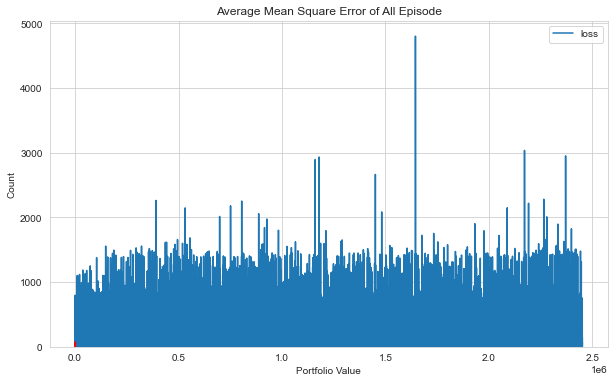

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

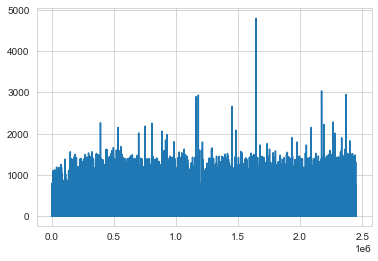

In [5]:
plt.plot(agent.model.losses)

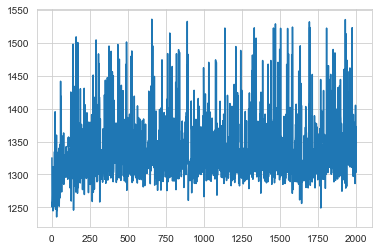

In [6]:
plt.plot(portfolio_value)

episode end value: 1165.28, duration: 0:00:00.183044
Sell: 209 times, Buy: 203 times


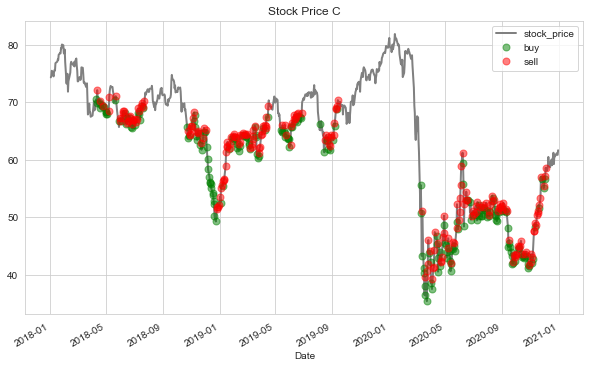

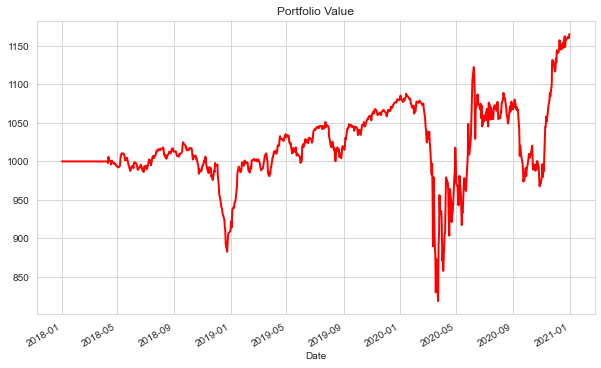

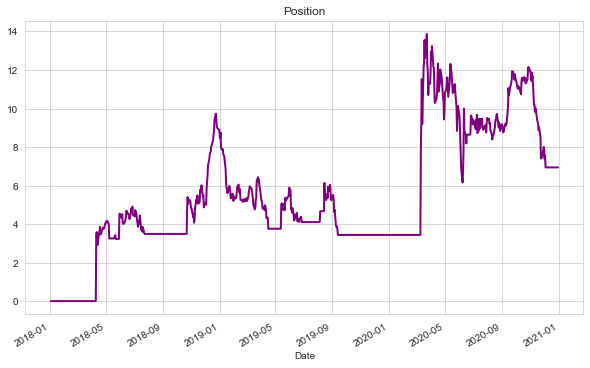

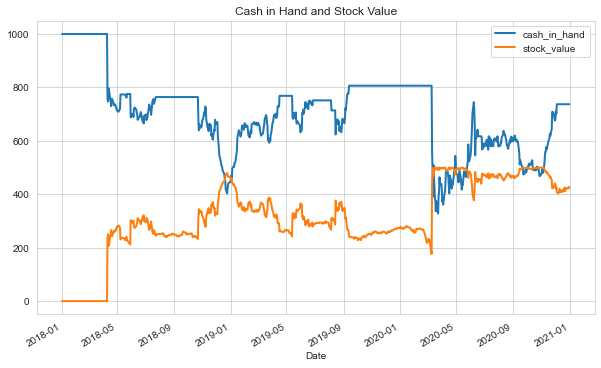

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: C
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 5.23 %
Volatility: 0.1960
shape ratio: 0.2108
Maximun drawdown: -24.74 %
Calmar ratio: 0.2115
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -6.05 %
Volatility (benchmark): 0.4375
shape ratio: -0.1635
Maximun drawdown: -56.79 %
Calmar ratio (benchmark): -0.1066


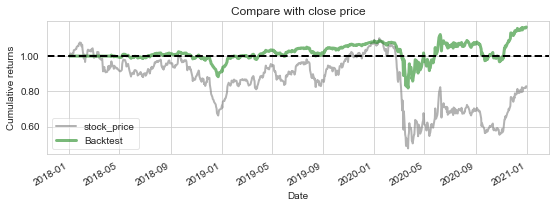

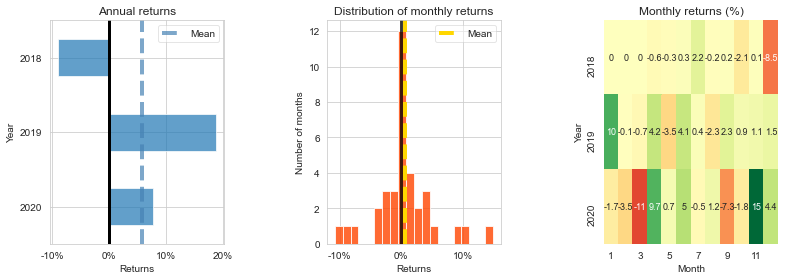

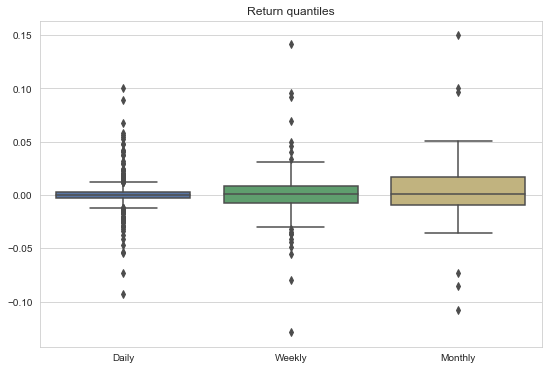

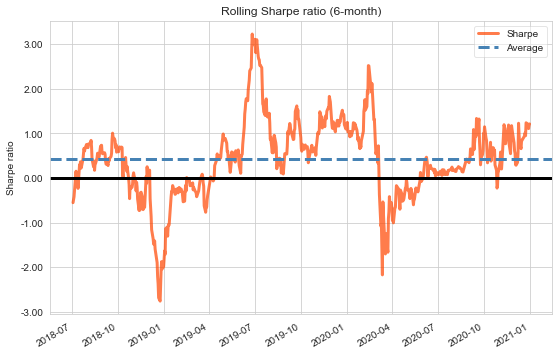

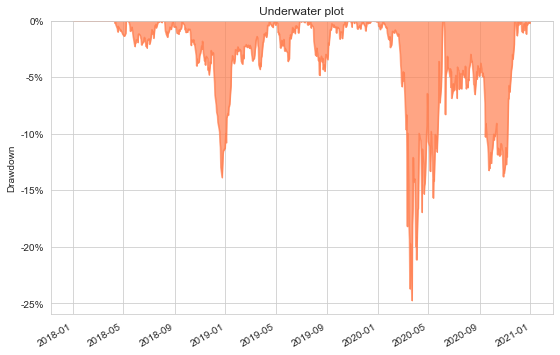

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')